In [ ]:
import pandas as pd
import os

folder_path = "/Users/sumitprakash/Desktop/sustainify/SustAInify _24_ Power Exchange Data"
output_file = "concatenated_dataset.csv"

data_frames = []

for file in os.listdir(folder_path):
    if file.endswith(".xlsx") or file.endswith(".xlsm"):
        file_path = os.path.join(folder_path, file)
        try:
            data_frame = pd.read_excel(file_path, sheet_name='Daily Prices & Volumes')
            data_frame = data_frame.drop('Traded volumes (MWh)', axis=1)
            # data_frame['Date'] = pd.to_datetime(data_frame['Date'], format='%d/%m/%Y', errors='coerce')
        except:
            data_frame = pd.read_excel(file_path, sheet_name='Daily Prices')

        data_frame.columns = ['Date', 'Average Price (EUR/MWh)']
        print(data_frame.head())
        data_frames.append(data_frame)

concatenated_data = pd.concat(data_frames, ignore_index=True)

concatenated_data['Date'] = pd.to_datetime(concatenated_data['Date'], infer_datetime_format=True, errors='coerce')

dataset = concatenated_data.sort_values(by='Date', ascending=True)

dataset.to_csv(output_file, index=False)

In [26]:
import numpy as np
import pandas as pd

file_path = "concatenated_dataset.csv"
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df.dropna()

train = df[df.index.year < 2017]
test = df[df.index.year == 2017]

months = [x.month for x in train.index]
years = [x.year for x in train.index]
day = [x.day for x in train.index]

X = np.array([day, months, years]).T

months = [x.month for x in test.index]
years = [x.year for x in test.index]
day = [x.day for x in test.index]

X_test = np.array([day, months, years]).T

In [27]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

my_rf = RandomForestRegressor()
my_rf.fit(X, train['Average Price (EUR/MWh)'])

# predict on the same period
# preds = my_rf.predict(x_test)

/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


RandomForestRegressor()

In [28]:
preds = my_rf.predict(X_test)

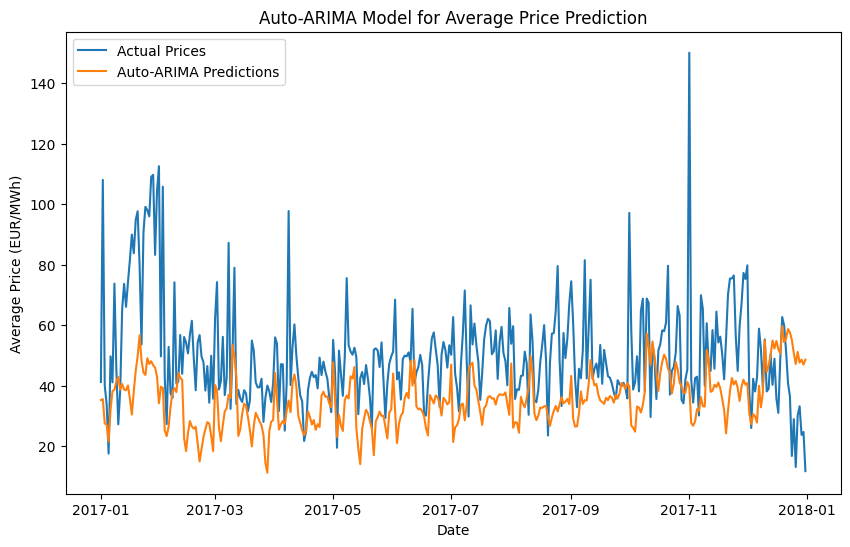

In [29]:
plt.figure(figsize=(10, 6))
# plt.plot(train.index, train['Average Price (EUR/MWh)'], label='Training Data')
plt.plot(test.index, test['Average Price (EUR/MWh)'], label='Actual Prices')
plt.plot(test.index, preds, label='Auto-ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Average Price (EUR/MWh)')
plt.title('Auto-ARIMA Model for Average Price Prediction')
plt.legend()
plt.show()

In [30]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [200, 500, 1000, 1200]

max_features = ['auto']

max_depth = [int(x) for x in np.linspace(100, 500, num = 4)]
max_depth.append(None)
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

rfc_random = RandomizedSearchCV(estimator = my_rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)

rfc_random.fit(X_test, test['Average Price (EUR/MWh)'])

print(rfc_random.best_params_)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.Spar

[CV] END .max_depth=100, max_features=auto, n_estimators=200; total time=   0.2s
[CV] END .max_depth=100, max_features=auto, n_estimators=200; total time=   0.2s
[CV] END .max_depth=233, max_features=auto, n_estimators=200; total time=   0.2s


/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

[CV] END .max_depth=233, max_features=auto, n_estimators=200; total time=   0.2s
[CV] END .max_depth=100, max_features=auto, n_estimators=500; total time=   0.4s


/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

[CV] END .max_depth=100, max_features=auto, n_estimators=500; total time=   0.6s


/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

[CV] END .max_depth=233, max_features=auto, n_estimators=500; total time=   0.5s
[CV] END .max_depth=233, max_features=auto, n_estimators=500; total time=   0.5s
[CV] END max_depth=100, max_features=auto, n_estimators=1000; total time=   0.9s
[CV] END max_depth=100, max_features=auto, n_estimators=1000; total time=   0.9s


/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

[CV] END max_depth=100, max_features=auto, n_estimators=1200; total time=   1.1s
[CV] END .max_depth=366, max_features=auto, n_estimators=200; total time=   0.2s
[CV] END max_depth=100, max_features=auto, n_estimators=1200; total time=   1.2s
[CV] END .max_depth=366, max_features=auto, n_estimators=200; total time=   0.3s


/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

[CV] END .max_depth=366, max_features=auto, n_estimators=500; total time=   0.5s
[CV] END max_depth=233, max_features=auto, n_estimators=1000; total time=   1.0s
[CV] END .max_depth=366, max_features=auto, n_estimators=500; total time=   0.5s
[CV] END max_depth=233, max_features=auto, n_estimators=1000; total time=   1.2s


/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

[CV] END .max_depth=500, max_features=auto, n_estimators=200; total time=   0.2s
[CV] END .max_depth=500, max_features=auto, n_estimators=200; total time=   0.2s
[CV] END max_depth=366, max_features=auto, n_estimators=1000; total time=   0.8s
[CV] END max_depth=366, max_features=auto, n_estimators=1000; total time=   0.9s
[CV] END max_depth=233, max_features=auto, n_estimators=1200; total time=   1.2s


/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

[CV] END max_depth=233, max_features=auto, n_estimators=1200; total time=   1.3s


/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

[CV] END .max_depth=500, max_features=auto, n_estimators=500; total time=   0.5s
[CV] END .max_depth=500, max_features=auto, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=auto, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, n_estimators=200; total time=   0.2s
[CV] END max_depth=366, max_features=auto, n_estimators=1200; total time=   1.0s


/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

[CV] END max_depth=500, max_features=auto, n_estimators=1000; total time=   0.8s
[CV] END max_depth=366, max_features=auto, n_estimators=1200; total time=   1.3s
[CV] END max_depth=None, max_features=auto, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=auto, n_estimators=500; total time=   0.5s
[CV] END max_depth=500, max_features=auto, n_estimators=1000; total time=   1.1s


/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

[CV] END max_depth=500, max_features=auto, n_estimators=1200; total time=   1.0s
[CV] END max_depth=500, max_features=auto, n_estimators=1200; total time=   1.2s


/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

[CV] END max_depth=None, max_features=auto, n_estimators=1000; total time=   0.8s
[CV] END max_depth=None, max_features=auto, n_estimators=1000; total time=   0.7s


/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

[CV] END max_depth=None, max_features=auto, n_estimators=1200; total time=   0.8s
[CV] END max_depth=None, max_features=auto, n_estimators=1200; total time=   0.7s
{'n_estimators': 500, 'max_features': 'auto', 'max_depth': 366}


In [32]:
from sklearn.metrics import r2_score

rfc2 = RandomForestRegressor(n_estimators = 500)
rfc2.fit(X, train['Average Price (EUR/MWh)'])

rfc_predict2 = rfc2.predict(X_test)
r2 = r2_score(test['Average Price (EUR/MWh)'], rfc_predict2)

/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sumitprakash/venv-metal/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

In [33]:
print(r2)

-0.7093719060807777


In [43]:
n = len(test['Average Price (EUR/MWh)'])
k = 1

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: -0.7140809195961517


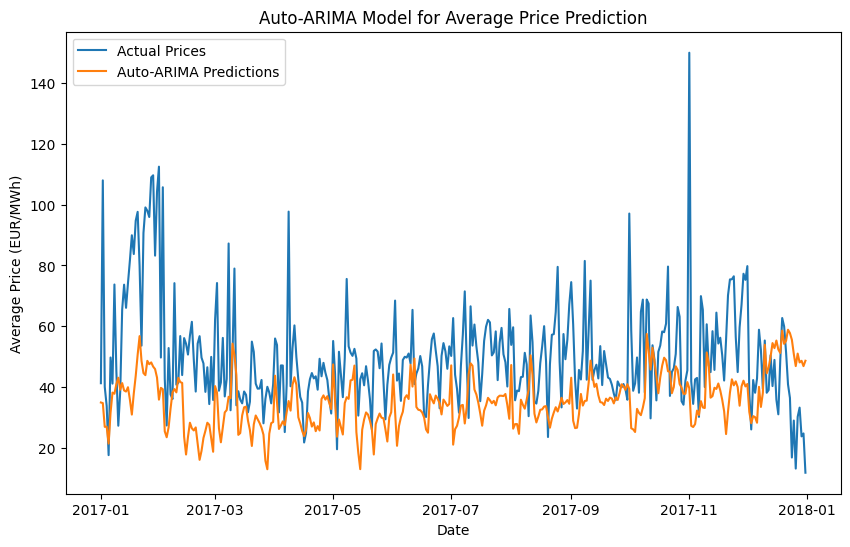

In [34]:
plt.figure(figsize=(10, 6))
# plt.plot(train.index, train['Average Price (EUR/MWh)'], label='Training Data')
plt.plot(test.index, test['Average Price (EUR/MWh)'], label='Actual Prices')
plt.plot(test.index, rfc_predict2, label='Auto-ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Average Price (EUR/MWh)')
plt.title('Auto-ARIMA Model for Average Price Prediction')
plt.legend()
plt.show()

In [39]:
date_range_2018 = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D')
df = pd.DataFrame()
df['Date'] = date_range_2018
df['Average Price (EUR/MWh)'] = None
# extract the seasonality data
months = [x.month for x in df['Date']]
years = [x.year for x in df['Date']]
day = [x.day for x in df['Date']]

X_2018 = np.array([day, months, years]).T

In [40]:
pred_2018 = rfc2.predict(X_2018)

In [41]:
df['Average Price (EUR/MWh)'] = pred_2018
df.head()

,Date,Average Price (EUR/MWh)
0,2018-01-01,34.912662
1,2018-01-02,34.713267
2,2018-01-03,26.897313
3,2018-01-04,26.954245
4,2018-01-05,21.379437


In [42]:
df.to_csv('2018.csv', index=False)